In [3]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터를 불러온다

In [5]:
df1 = pd.read_parquet('open/train/6.채널정보/train_채널정보_전처리')
df1

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,방문횟수_PC_R6M,방문일수_PC_R6M,...,IB문의건수_CL_RV_R6M,IB문의건수_CS_R6M,불만제기후경과월_R12M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,Segment
0,201807,TRAIN_000000,10회 이상,10회 이상,8,2,6,2,1회 이상,1회 이상,...,0,0,12,22,221,0,0,0,0,D
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,12,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1회 이상,1회 이상,1,2,5,1,10회 이상,10회 이상,...,0,0,12,0,0,11,6,5,5,C
3,201807,TRAIN_000003,10회 이상,10회 이상,10,2,6,2,1회 이상,1회 이상,...,0,0,12,23,219,0,0,0,0,D
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,12,0,0,0,0,0,0,D
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,12,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,0,0,0,0,E


### 수치형, 범주형 데이터를 분리한다.

In [8]:
# df에서 dtype이 int64인 것을 수치형, object인 것을 범주형으로 분리
num_list = []
cat_list = []

columns_list = df1.columns.tolist()
data_list = df1.dtypes.tolist()

for i in range(len(columns_list)):
    if data_list[i] == 'int64':
        if columns_list[i] == '기준년월':
            continue
        num_list.append(columns_list[i])
    elif data_list[i] == 'object':
        cat_list.append(columns_list[i])
    else:
        print(f"{columns_list[i]}: 땡")


print("수치형 컬럼:", num_list)
print("범주형 컬럼:", cat_list)

수치형 컬럼: ['인입일수_ARS_R6M', '인입횟수_ARS_B0M', '이용메뉴건수_ARS_B0M', '인입일수_ARS_B0M', '방문일수_앱_R6M', '방문횟수_모바일웹_R6M', '방문일수_모바일웹_R6M', '방문횟수_PC_B0M', '방문일수_PC_B0M', '방문횟수_앱_B0M', '방문일수_앱_B0M', '방문횟수_모바일웹_B0M', '방문일수_모바일웹_B0M', '인입횟수_IB_R6M', '인입일수_IB_R6M', '이용메뉴건수_IB_R6M', '인입횟수_IB_B0M', '인입일수_IB_B0M', '이용메뉴건수_IB_B0M', '상담건수_B0M', 'IB문의건수_사용승인내역_B0M', 'IB문의건수_선결제_B0M', 'IB문의건수_카드발급_B0M', 'IB문의건수_CL_RV_B0M', 'IB문의건수_CS_B0M', '상담건수_R6M', 'IB문의건수_사용승인내역_R6M', 'IB문의건수_한도_R6M', 'IB문의건수_선결제_R6M', 'IB문의건수_결제_R6M', 'IB문의건수_할부_R6M', 'IB문의건수_정보변경_R6M', 'IB문의건수_결제일변경_R6M', 'IB문의건수_비밀번호_R6M', 'IB문의건수_SMS_R6M', 'IB문의건수_부대서비스_R6M', 'IB문의건수_포인트_R6M', 'IB문의건수_카드발급_R6M', 'IB문의건수_BL_R6M', 'IB문의건수_분실도난_R6M', 'IB문의건수_CA_R6M', 'IB문의건수_CL_RV_R6M', 'IB문의건수_CS_R6M', '불만제기후경과월_R12M', '당사멤버쉽_방문횟수_B0M', '당사멤버쉽_방문횟수_R6M', '홈페이지_금융건수_R6M', '홈페이지_선결제건수_R6M', '홈페이지_금융건수_R3M', '홈페이지_선결제건수_R3M']
범주형 컬럼: ['ID', '인입횟수_ARS_R6M', '이용메뉴건수_ARS_R6M', '방문횟수_PC_R6M', '방문일수_PC_R6M', '방문횟수_앱_R6M', 'Segment']


### 수치형 데이터의 상관계수를 확인한다.

In [10]:
# segment 컬럼 원핫인코딩
df2 = pd.get_dummies(df1, columns=['Segment'], prefix='segment', drop_first=False)

In [12]:
df2

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,방문횟수_PC_R6M,방문일수_PC_R6M,...,당사멤버쉽_방문횟수_R6M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,segment_A,segment_B,segment_C,segment_D,segment_E
0,201807,TRAIN_000000,10회 이상,10회 이상,8,2,6,2,1회 이상,1회 이상,...,221,0,0,0,0,False,False,False,True,False
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True
2,201807,TRAIN_000002,1회 이상,1회 이상,1,2,5,1,10회 이상,10회 이상,...,0,11,6,5,5,False,False,True,False,False
3,201807,TRAIN_000003,10회 이상,10회 이상,10,2,6,2,1회 이상,1회 이상,...,219,0,0,0,0,False,False,False,True,False
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,True,False
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,True,False,False
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True


In [16]:
# 'segment'가 컬럼명에 포함된 컬럼만 리스트로 추출
seg_list = [col for col in df2.columns if 'segment' in col]
seg_list

['segment_A', 'segment_B', 'segment_C', 'segment_D', 'segment_E']

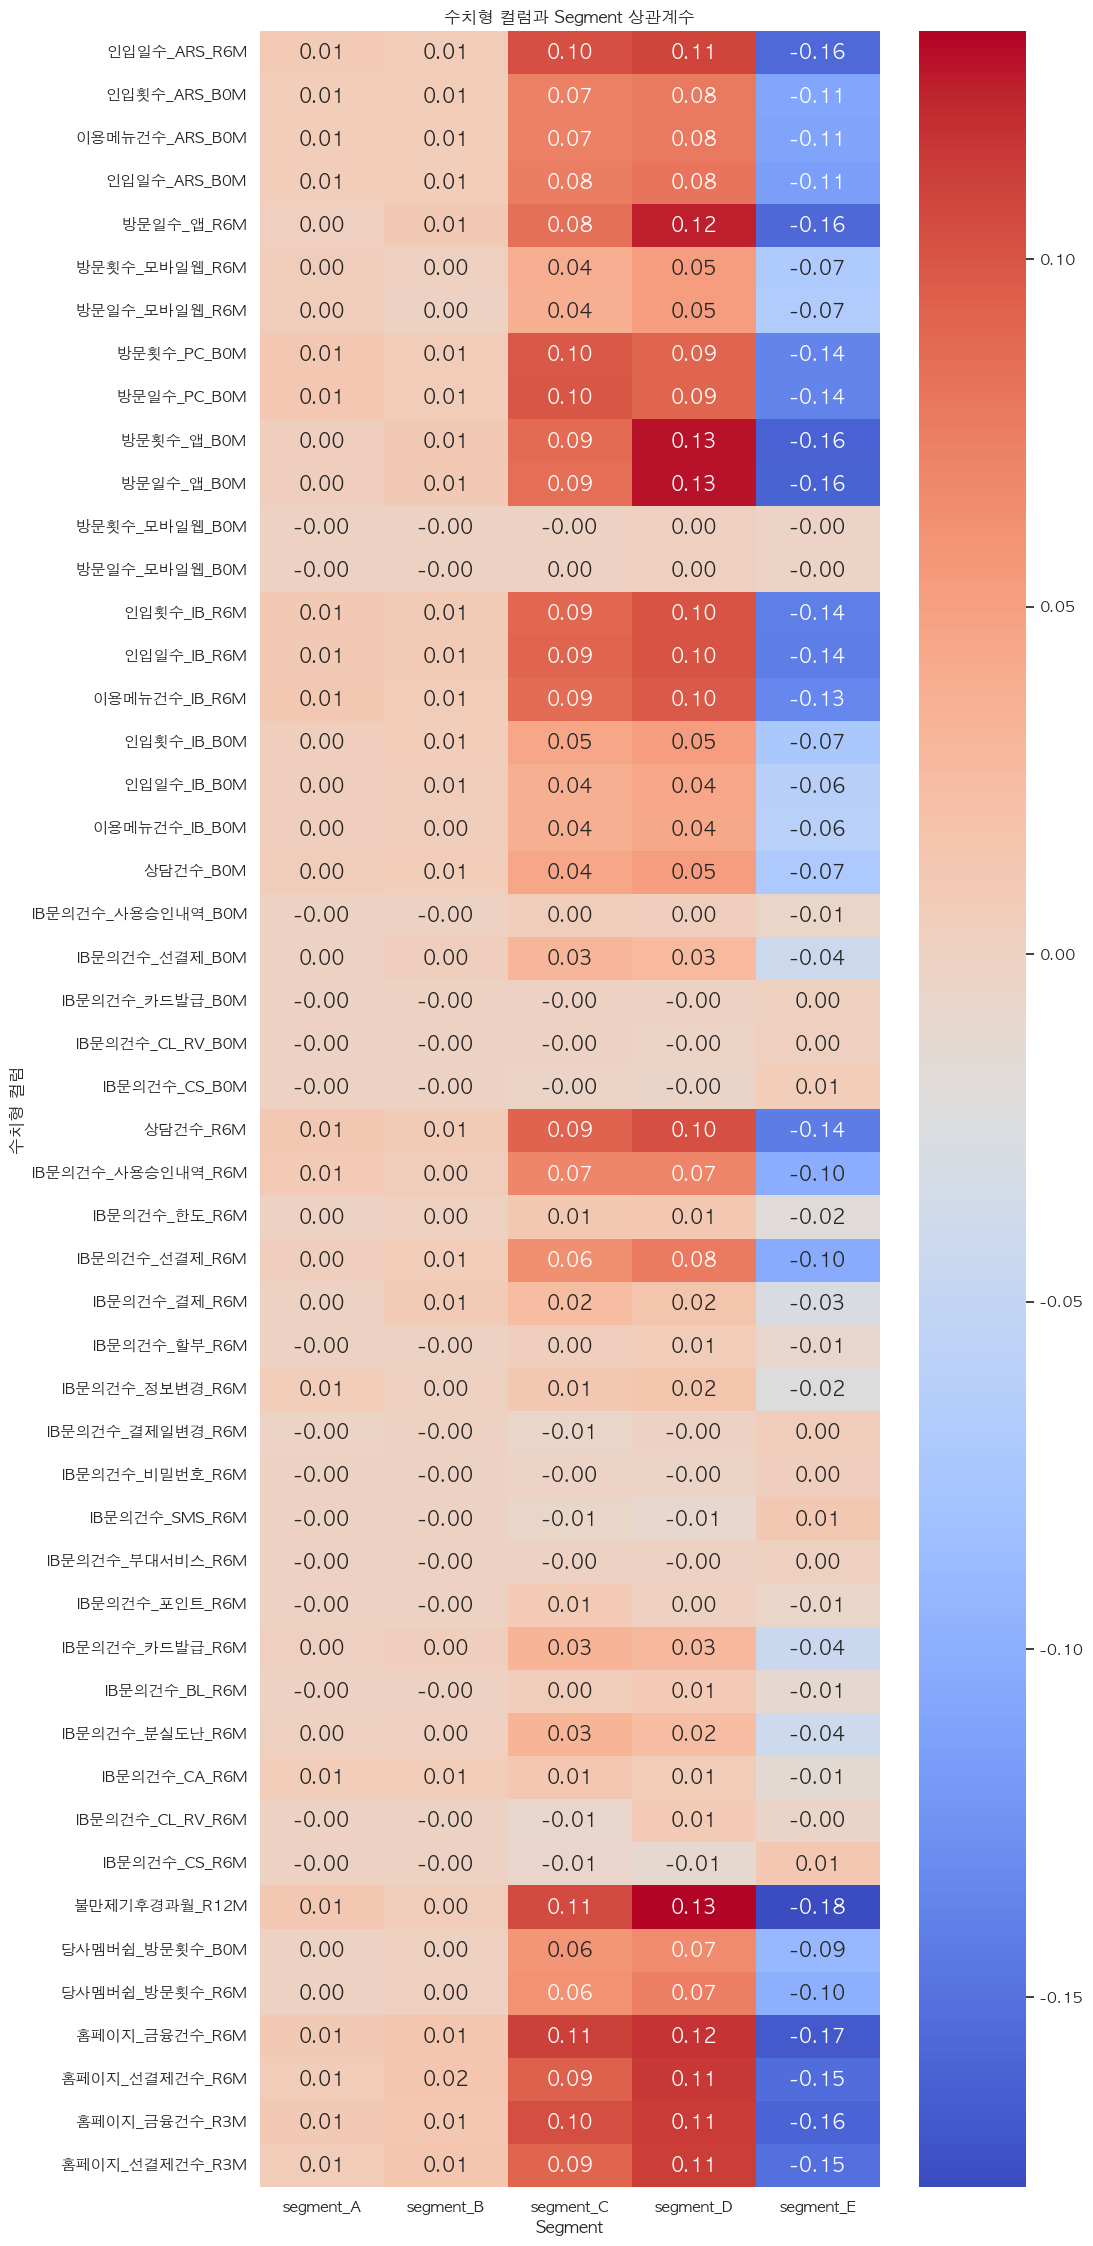

In [18]:
corr_df = pd.DataFrame(index=num_list, columns=seg_list)
for num_col in num_list:
    for seg_col in seg_list:
        corr_df.loc[num_col, seg_col] = df2[num_col].corr(df2[seg_col])
corr_df = corr_df.astype(float)

# 히트맵 시각화
plt.figure(figsize=(10, len(num_list)*0.5 + 3))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 컬럼과 Segment 상관계수')
plt.xlabel('Segment')
plt.ylabel('수치형 컬럼')
plt.show()

In [20]:
threshold = 0.1
important_vars = corr_df[
    (corr_df.abs() > threshold).any(axis=1)
].index.tolist()

In [22]:
important_vars

['인입일수_ARS_R6M',
 '인입횟수_ARS_B0M',
 '이용메뉴건수_ARS_B0M',
 '인입일수_ARS_B0M',
 '방문일수_앱_R6M',
 '방문횟수_PC_B0M',
 '방문일수_PC_B0M',
 '방문횟수_앱_B0M',
 '방문일수_앱_B0M',
 '인입횟수_IB_R6M',
 '인입일수_IB_R6M',
 '이용메뉴건수_IB_R6M',
 '상담건수_R6M',
 'IB문의건수_사용승인내역_R6M',
 'IB문의건수_선결제_R6M',
 '불만제기후경과월_R12M',
 '홈페이지_금융건수_R6M',
 '홈페이지_선결제건수_R6M',
 '홈페이지_금융건수_R3M',
 '홈페이지_선결제건수_R3M']

### 범주형 데이터와 Segment 상관관계 확인 (카이제곱 분석)

In [32]:
cat_list

['ID',
 '인입횟수_ARS_R6M',
 '이용메뉴건수_ARS_R6M',
 '방문횟수_PC_R6M',
 '방문일수_PC_R6M',
 '방문횟수_앱_R6M',
 'Segment']

In [34]:
ycol = "Segment"             # 타깃 컬럼
cat_cols = [
 '인입횟수_ARS_R6M',
 '이용메뉴건수_ARS_R6M',
 '방문횟수_PC_R6M',
 '방문일수_PC_R6M',
 '방문횟수_앱_R6M',
 ] # 범주형 컬럼 리스트

results = []

for col in cat_cols:
    ct = pd.crosstab(df1[col], df1[ycol])            # 교차표
    chi2, p, dof, _ = chi2_contingency(ct)
    results.append({"column": col,
                    "chi2": chi2,
                    "dof": dof,
                    "p_value": p,
                    "n_levels": len(ct)})

# 결과를 p-value 오름차순으로 정렬
chi_df = (pd.DataFrame(results)
            .sort_values("p_value")
            .reset_index(drop=True))

display(chi_df.head(20))        # p-value가 작은 컬럼 Top 20

NameError: name 'chi2_contingency' is not defined

In [30]:
import scipy.stats as st

def cramers_v(ct):
    chi2, _, _, _ = st.chi2_contingency(ct)
    n = ct.sum().sum()
    k = min(ct.shape)-1
    return np.sqrt(chi2 / (n * k))

for col in ['인입횟수_ARS_R6M',
 '이용메뉴건수_ARS_R6M',
 '방문횟수_PC_R6M',
 '방문일수_PC_R6M',
 '방문횟수_앱_R6M']:
    ct = pd.crosstab(df1[col], df1["Segment"])
    print(f"{col:25}: Cramér's V = {cramers_v(ct):.3f}")

인입횟수_ARS_R6M             : Cramér's V = 0.111
이용메뉴건수_ARS_R6M           : Cramér's V = 0.063
방문횟수_PC_R6M              : Cramér's V = 0.075
방문일수_PC_R6M              : Cramér's V = 0.082
방문횟수_앱_R6M               : Cramér's V = 0.076


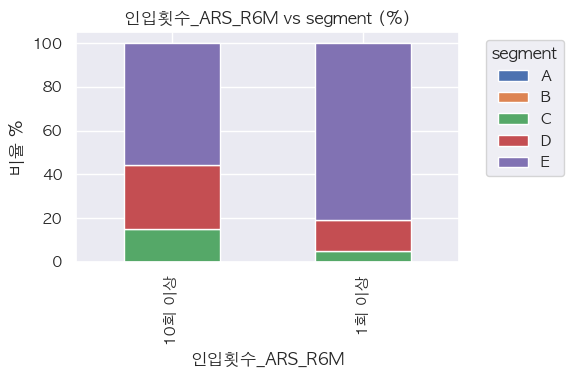

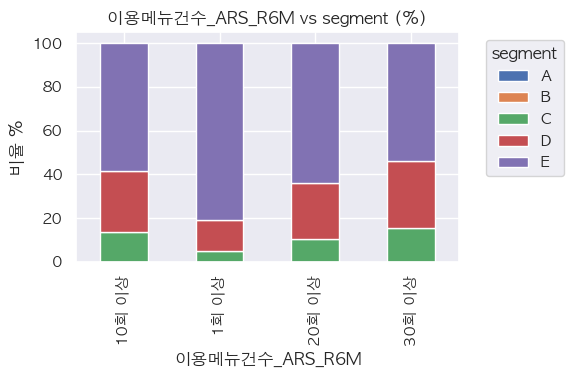

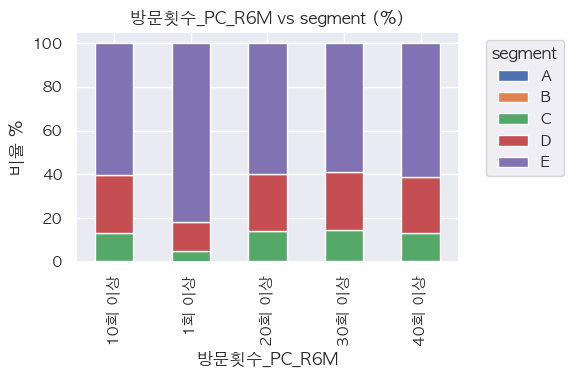

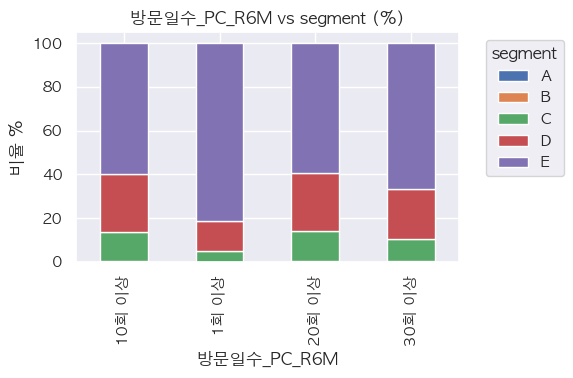

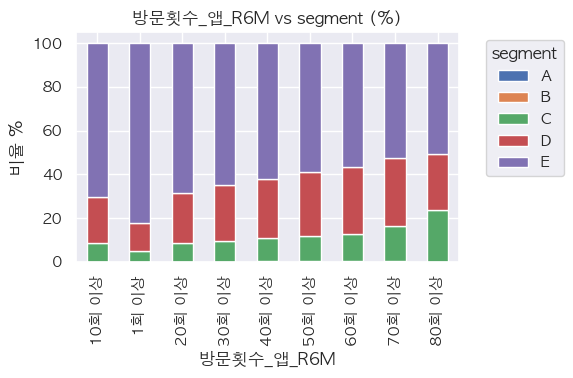

In [36]:
for col in ['인입횟수_ARS_R6M',
 '이용메뉴건수_ARS_R6M',
 '방문횟수_PC_R6M',
 '방문일수_PC_R6M',
 '방문횟수_앱_R6M']:
    ct_pct = (pd.crosstab(df1[col], df1["Segment"], normalize="index")*100)
    ct_pct.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title(f"{col} vs segment (%)")
    plt.ylabel("비율 %")
    plt.legend(title="segment", bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()

모든 범주형 컬럼이 Cramer V 값은 작지만, 카이제곱 값은 높게 나오므로, 넣어보고 모델의 feature importance로 결정하기로 함.

In [38]:
df2

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,방문횟수_PC_R6M,방문일수_PC_R6M,...,당사멤버쉽_방문횟수_R6M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,segment_A,segment_B,segment_C,segment_D,segment_E
0,201807,TRAIN_000000,10회 이상,10회 이상,8,2,6,2,1회 이상,1회 이상,...,221,0,0,0,0,False,False,False,True,False
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True
2,201807,TRAIN_000002,1회 이상,1회 이상,1,2,5,1,10회 이상,10회 이상,...,0,11,6,5,5,False,False,True,False,False
3,201807,TRAIN_000003,10회 이상,10회 이상,10,2,6,2,1회 이상,1회 이상,...,219,0,0,0,0,False,False,False,True,False
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,True,False
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,True,False,False
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,1회 이상,1회 이상,...,0,0,0,0,0,False,False,False,False,True


### 최종 컬럼

In [42]:
cols_to_save = ['ID', 'Segment', '인입일수_ARS_R6M',
 '인입횟수_ARS_B0M',
 '이용메뉴건수_ARS_B0M',
 '인입일수_ARS_B0M',
 '방문일수_앱_R6M',
 '방문횟수_PC_B0M',
 '방문일수_PC_B0M',
 '방문횟수_앱_B0M',
 '방문일수_앱_B0M',
 '인입횟수_IB_R6M',
 '인입일수_IB_R6M',
 '이용메뉴건수_IB_R6M',
 '상담건수_R6M',
 'IB문의건수_사용승인내역_R6M',
 'IB문의건수_선결제_R6M',
 '불만제기후경과월_R12M',
 '홈페이지_금융건수_R6M',
 '홈페이지_선결제건수_R6M',
 '홈페이지_금융건수_R3M',
 '홈페이지_선결제건수_R3M',
 '인입횟수_ARS_R6M',
 '이용메뉴건수_ARS_R6M',
 '방문횟수_PC_R6M',
 '방문일수_PC_R6M',
 '방문횟수_앱_R6M']

In [44]:
df3 = df1[cols_to_save].copy()

In [46]:
df3

,ID,Segment,인입일수_ARS_R6M,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,방문일수_앱_R6M,방문횟수_PC_B0M,방문일수_PC_B0M,방문횟수_앱_B0M,...,불만제기후경과월_R12M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,방문횟수_PC_R6M,방문일수_PC_R6M,방문횟수_앱_R6M
0,TRAIN_000000,D,8,2,6,2,0,0,0,0,...,12,0,0,0,0,10회 이상,10회 이상,1회 이상,1회 이상,1회 이상
1,TRAIN_000001,E,0,0,0,0,0,0,0,0,...,12,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2,TRAIN_000002,C,1,2,5,1,30,5,4,7,...,12,11,6,5,5,1회 이상,1회 이상,10회 이상,10회 이상,30회 이상
3,TRAIN_000003,D,10,2,6,2,0,0,0,0,...,12,0,0,0,0,10회 이상,10회 이상,1회 이상,1회 이상,1회 이상
4,TRAIN_000004,E,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399995,E,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2399996,TRAIN_399996,D,0,0,0,0,0,0,0,0,...,12,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2399997,TRAIN_399997,C,0,0,0,0,0,0,0,0,...,12,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2399998,TRAIN_399998,E,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상


In [48]:
import re
import pandas as pd

# ---------------------------------------
# 0) 서열(순서) 컬럼 목록
# ---------------------------------------
ord_cols = [
    '인입횟수_ARS_R6M',
    '이용메뉴건수_ARS_R6M',
    '방문횟수_PC_R6M',
    '방문일수_PC_R6M',
    '방문횟수_앱_R6M'
]

# ---------------------------------------
# 1) 순서형 인코딩 함수 (in-place 덮어쓰기)
# ---------------------------------------
def ordinal_inplace(df: pd.DataFrame, col: str):
    """
    예: '1회 이상', '10회 이상' → 0, 1, …
    """
    # ① 고유값 수집
    uniq = df3[col].dropna().unique()
    
    # ② 문자열에서 숫자 추출해 오름차순 정렬
    key = lambda s: int(re.search(r'\d+', str(s)).group())
    ordered = sorted(uniq, key=key)
    
    # ③ 매핑 생성 {원본: 숫자}
    mapping = {v: i for i, v in enumerate(ordered)}
    
    # ④ 컬럼 덮어쓰기 (dtype=int8)
    df3[col] = df3[col].map(mapping).astype('int8')
    print(f"[{col}] 매핑 ▶ {mapping}")

# ---------------------------------------
# 2) 모든 서열 컬럼 변환
# ---------------------------------------
df4 = df3.copy()          # ← 원본 살리고 싶다면
for c in ord_cols:
    ordinal_inplace(df4, c)

# ---------------------------------------
# 3) 확인
print(df4[ord_cols].dtypes)   # int8로 바뀐 것 확인
print(df4[ord_cols].head())

[인입횟수_ARS_R6M] 매핑 ▶ {'1회 이상': 0, '10회 이상': 1}
[이용메뉴건수_ARS_R6M] 매핑 ▶ {'1회 이상': 0, '10회 이상': 1, '20회 이상': 2, '30회 이상': 3}
[방문횟수_PC_R6M] 매핑 ▶ {'1회 이상': 0, '10회 이상': 1, '20회 이상': 2, '30회 이상': 3, '40회 이상': 4}
[방문일수_PC_R6M] 매핑 ▶ {'1회 이상': 0, '10회 이상': 1, '20회 이상': 2, '30회 이상': 3}
[방문횟수_앱_R6M] 매핑 ▶ {'1회 이상': 0, '10회 이상': 1, '20회 이상': 2, '30회 이상': 3, '40회 이상': 4, '50회 이상': 5, '60회 이상': 6, '70회 이상': 7, '80회 이상': 8}
인입횟수_ARS_R6M      object
이용메뉴건수_ARS_R6M    object
방문횟수_PC_R6M       object
방문일수_PC_R6M       object
방문횟수_앱_R6M        object
dtype: object
  인입횟수_ARS_R6M 이용메뉴건수_ARS_R6M 방문횟수_PC_R6M 방문일수_PC_R6M 방문횟수_앱_R6M
0       10회 이상         10회 이상       1회 이상       1회 이상      1회 이상
1        1회 이상          1회 이상       1회 이상       1회 이상      1회 이상
2        1회 이상          1회 이상      10회 이상      10회 이상     30회 이상
3       10회 이상         10회 이상       1회 이상       1회 이상      1회 이상
4        1회 이상          1회 이상       1회 이상       1회 이상      1회 이상


In [50]:
del df4['Segment']

In [52]:
df4

,ID,인입일수_ARS_R6M,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,방문일수_앱_R6M,방문횟수_PC_B0M,방문일수_PC_B0M,방문횟수_앱_B0M,방문일수_앱_B0M,...,불만제기후경과월_R12M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,방문횟수_PC_R6M,방문일수_PC_R6M,방문횟수_앱_R6M
0,TRAIN_000000,8,2,6,2,0,0,0,0,0,...,12,0,0,0,0,10회 이상,10회 이상,1회 이상,1회 이상,1회 이상
1,TRAIN_000001,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2,TRAIN_000002,1,2,5,1,30,5,4,7,5,...,12,11,6,5,5,1회 이상,1회 이상,10회 이상,10회 이상,30회 이상
3,TRAIN_000003,10,2,6,2,0,0,0,0,0,...,12,0,0,0,0,10회 이상,10회 이상,1회 이상,1회 이상,1회 이상
4,TRAIN_000004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2399996,TRAIN_399996,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2399997,TRAIN_399997,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상
2399998,TRAIN_399998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상


In [58]:
a = pd.read_parquet('open/train/6.채널정보/train_채널정보_parquet')

In [60]:
a

,ID,인입일수_ARS_R6M,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,방문일수_앱_R6M,방문횟수_PC_B0M,방문일수_PC_B0M,방문횟수_앱_B0M,방문일수_앱_B0M,...,불만제기후경과월_R12M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,방문횟수_PC_R6M,방문일수_PC_R6M,방문횟수_앱_R6M
0,TRAIN_000000,8,2,6,2,0,0,0,0,0,...,12,0,0,0,0,1,1,0,0,0
1,TRAIN_000001,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
2,TRAIN_000002,1,2,5,1,30,5,4,7,5,...,12,11,6,5,5,0,0,1,1,3
3,TRAIN_000003,10,2,6,2,0,0,0,0,0,...,12,0,0,0,0,1,1,0,0,0
4,TRAIN_000004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399996,TRAIN_399996,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
2399997,TRAIN_399997,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
2399998,TRAIN_399998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
a.insert(
    loc=0,                       # 맨 앞
    column='기준년월',
    value=df2['기준년월'].values  # ↔ 행 순서 그대로 대응
)

In [64]:
a

,기준년월,ID,인입일수_ARS_R6M,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,방문일수_앱_R6M,방문횟수_PC_B0M,방문일수_PC_B0M,방문횟수_앱_B0M,...,불만제기후경과월_R12M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,방문횟수_PC_R6M,방문일수_PC_R6M,방문횟수_앱_R6M
0,201807,TRAIN_000000,8,2,6,2,0,0,0,0,...,12,0,0,0,0,1,1,0,0,0
1,201807,TRAIN_000001,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
2,201807,TRAIN_000002,1,2,5,1,30,5,4,7,...,12,11,6,5,5,0,0,1,1,3
3,201807,TRAIN_000003,10,2,6,2,0,0,0,0,...,12,0,0,0,0,1,1,0,0,0
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
2399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
a.to_parquet('open/train/6.채널정보/train_채널정보.parquet')

In [70]:
col_list = a.columns.tolist()

print(col_list)

['기준년월', 'ID', '인입일수_ARS_R6M', '인입횟수_ARS_B0M', '이용메뉴건수_ARS_B0M', '인입일수_ARS_B0M', '방문일수_앱_R6M', '방문횟수_PC_B0M', '방문일수_PC_B0M', '방문횟수_앱_B0M', '방문일수_앱_B0M', '인입횟수_IB_R6M', '인입일수_IB_R6M', '이용메뉴건수_IB_R6M', '상담건수_R6M', 'IB문의건수_사용승인내역_R6M', 'IB문의건수_선결제_R6M', '불만제기후경과월_R12M', '홈페이지_금융건수_R6M', '홈페이지_선결제건수_R6M', '홈페이지_금융건수_R3M', '홈페이지_선결제건수_R3M', '인입횟수_ARS_R6M', '이용메뉴건수_ARS_R6M', '방문횟수_PC_R6M', '방문일수_PC_R6M', '방문횟수_앱_R6M']
